Image Recognition Using CIFAR10 Dataset

Import Necessary Libraries -- This code imports the necessary libraries for working with TensorFlow and Keras

In [1]:
!pip install tensorflow

In [40]:
from tensorflow.keras import Sequential, Input, datasets 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D 
import numpy as np 
from matplotlib import pyplot as plt 

Load Dataset -- This code loads the CIFAR10 Dataset

In [41]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data() 

This code displays the shapes of the X_train and X_test datasets

In [42]:
# Check Shape of Training Data 
X_train.shape

(50000, 32, 32, 3)

In [43]:
# Check Shape of Testing Data 
X_test.shape

(10000, 32, 32, 3)

Reshape -- It reshapes the y_train labels, and defines a list of class names for the CIFAR-10 dataset and checks the length of the class names.

In [44]:
y_train = y_train.reshape(-1, ) 
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [45]:
# Define class names for the CIFAR-10 dataset 
y_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship" , "truck"]

In [46]:
len(y_classes)

10

Observe Dataset -- It defines a function showImage to display images from the dataset with their corresponding labels. The function takes the dataset x, the labels y, and the index of the image to be displayed as parameters. It then uses matplotlib to plot the image with the label as the xlabel. The code also calls the showImage function to display the image at index 9 from the training dataset X_train with its corresponding label from y_train. This is useful for visualizing and understanding the dataset used in machine learning tasks.

In [47]:
def showImage(x, y, index): 
    plt.figure(figsize=(15, 2)) 
    plt.imshow(x[index]) 
    plt.xlabel(y_classes[y[index]])

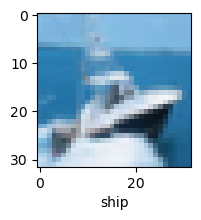

In [48]:
showImage(X_train, y_train, 8)

Normalize Dataset -- This code normalizes the training and test datasets by dividing by 255, which scales the pixel values to the range [0, 1]. The X_train[0] line displays the normalized pixel values of the first image in the training dataset.

In [49]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [50]:
X_train = X_train / 255 
X_test = X_test / 255 
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

Build Model -- This code sets up a Convolutional Neural Network (CNN) using the Keras library. The Sequential model is created, and several layers are added to it:
1. Conv2D Layer: This convolutional layer has 32 filters, each of size 3x3, and uses the ReLU activation function. It takes input images of shape (32, 32, 3).
2. MaxPooling2D Layer: This max-pooling layer reduces the dimensionality by taking the maximum value in each 2x2 pool.
3. Conv2D Layer: Another convolutional layer with 64 filters of size 4x4, using the ReLU activation function.
4. MaxPooling2D Layer: Another max-pooling layer.
5. Flatten Layer: This layer flattens the input to a 1D array, suitable for the fully connected layers.
6. Dense Layer: A fully connected layer with 34 units and ReLU activation.
7. Dense Layer: The output layer with 10 units and softmax activation, suitable for classification into 10 categories (e.g., CIFAR-10 classes).

In [67]:
model = Sequential()

# Define the input shape using the Input layer
model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4, 4), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=34, activation="relu"))
model.add(Dense(units=10, activation="softmax"))


Compile and Train Model -- This code compiles the model with the Adam optimizer and sparse categorical cross-entropy loss, and training the model with the CIFAR-10 dataset for 5 epochs.

In [68]:
model.compile( optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"] )

In [69]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.3366 - loss: 1.7984 - val_accuracy: 0.5136 - val_loss: 1.3502
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5522 - loss: 1.2601 - val_accuracy: 0.5897 - val_loss: 1.1583
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6207 - loss: 1.0861 - val_accuracy: 0.6304 - val_loss: 1.0593
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6511 - loss: 0.9976 - val_accuracy: 0.6503 - val_loss: 1.0091
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6734 - loss: 0.9360 - val_accuracy: 0.6695 - val_loss: 0.9539


Make Predictions -- This code snippet makes predictions on the test dataset X_test using the trained model. It then displays the prediction probabilities for the 10th test image (index 9). The code further converts these probabilities into class labels using np.argmax and stores them in y_predictions and displays the predictions made by the model.

In [70]:
y_predictions = model.predict(X_test) 
y_predictions[9]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([4.53766389e-03, 7.16536939e-01, 2.19505280e-04, 1.99425427e-04,
       1.38319869e-04, 3.12957745e-05, 1.87293554e-04, 1.18055774e-04,
       5.58028324e-03, 2.72451311e-01], dtype=float32)

In [71]:
y_predictions = [np.argmax(arr) for arr in y_predictions] 
y_predictions

[3,
 8,
 8,
 8,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 3,
 7,
 9,
 8,
 5,
 5,
 8,
 6,
 7,
 0,
 2,
 9,
 4,
 2,
 4,
 0,
 9,
 6,
 6,
 2,
 4,
 3,
 9,
 3,
 7,
 1,
 9,
 5,
 0,
 6,
 5,
 6,
 0,
 9,
 3,
 3,
 7,
 6,
 9,
 8,
 2,
 6,
 8,
 8,
 7,
 8,
 3,
 3,
 7,
 5,
 4,
 0,
 6,
 2,
 1,
 0,
 5,
 7,
 2,
 9,
 8,
 8,
 0,
 2,
 0,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 0,
 8,
 8,
 9,
 0,
 2,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 6,
 1,
 1,
 2,
 6,
 8,
 7,
 6,
 0,
 2,
 2,
 9,
 3,
 0,
 4,
 2,
 5,
 8,
 7,
 1,
 2,
 8,
 8,
 0,
 3,
 3,
 8,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 4,
 5,
 3,
 5,
 8,
 4,
 6,
 5,
 5,
 5,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 3,
 4,
 2,
 1,
 3,
 6,
 0,
 7,
 8,
 6,
 7,
 0,
 9,
 9,
 8,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 8,
 5,
 6,
 2,
 4,
 0,
 6,
 2,
 3,
 8,
 2,
 8,
 2,
 1,
 7,
 4,
 8,
 8,
 5,
 8,
 3,
 9,
 8,
 7,
 1,
 3,
 8,
 5,
 7,
 9,
 3,
 1,
 5,
 9,
 0,
 7,
 4,
 9,
 8,
 7,
 7,
 4,
 9,
 5,
 3,
 9,
 2,
 2,
 4,
 2,
 3,
 1,
 5,
 1,
 8,
 0,
 4,
 9,
 3,
 2,
 1,
 1,
 8,
 9,
 0,
 6,
 1,
 8,
 2,
 0,


Reshape the test data -- This code reshapes the y_test array, retrieves the prediction for the 5th test sample, and displays the 7th test image along with its label.

In [72]:
y_test = y_test.reshape(-1, )

In [73]:
y_predictions[4]

6

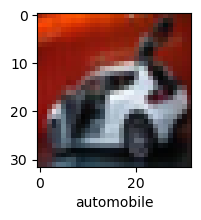

In [74]:
showImage(X_test, y_test, 6)

Evaluate Model -- This code evaluates the trained model on the test dataset X_test and y_test, and then uses the classification_report function from sklearn.metrics to print a detailed classification report. This report provides key metrics such as precision, recall, and F1-score for each class in the dataset, giving a comprehensive view of the model's performance.

In [75]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6727 - loss: 0.9513


[0.9538998007774353, 0.6694999933242798]

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1000
           1       0.74      0.84      0.79      1000
           2       0.53      0.58      0.55      1000
           3       0.47      0.46      0.47      1000
           4       0.62      0.64      0.63      1000
           5       0.67      0.47      0.55      1000
           6       0.76      0.76      0.76      1000
           7       0.70      0.74      0.72      1000
           8       0.70      0.81      0.75      1000
           9       0.81      0.68      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



This code generates a confusion matrix using sklearn.metrics's confusion_matrix function, which compares the true labels (y_test) and the predicted labels (y_predictions). The resulting confusion matrix is stored in the variable cm. The seaborn library is imported for potential visualization purposes, which is often used to create heatmaps to visually represent the confusion matrix.

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
cm = confusion_matrix(y_test, y_predictions) 
cm

array([[715,  28,  56,  21,  16,   3,   6,  17, 109,  29],
       [ 12, 837,   6,  10,   6,   1,   8,   3,  52,  65],
       [ 72,  14, 582,  57, 108,  34,  49,  52,  24,   8],
       [ 20,  16, 108, 461,  87, 120,  83,  47,  41,  17],
       [ 24,   4,  99,  51, 640,  18,  50,  89,  24,   1],
       [ 19,  10, 104, 217,  49, 472,  26,  78,  17,   8],
       [  9,  10,  66,  64,  57,  11, 759,   4,  15,   5],
       [ 19,   5,  58,  52,  60,  43,   6, 739,   5,  13],
       [ 76,  46,  12,  21,   4,   0,   3,   6, 815,  17],
       [ 31, 154,  16,  19,   7,   5,   8,  21,  64, 675]], dtype=int64)

In [79]:
import seaborn as sns

It sets the figure size, and creates a heatmap of the confusion matrix (cm) with annotations. The axes are labeled "Truth" and "Predictions," and the plot is titled "Confusion Matrix." This visualization helps in evaluating the performance of a classification model by showing the number of correct and incorrect predictions.

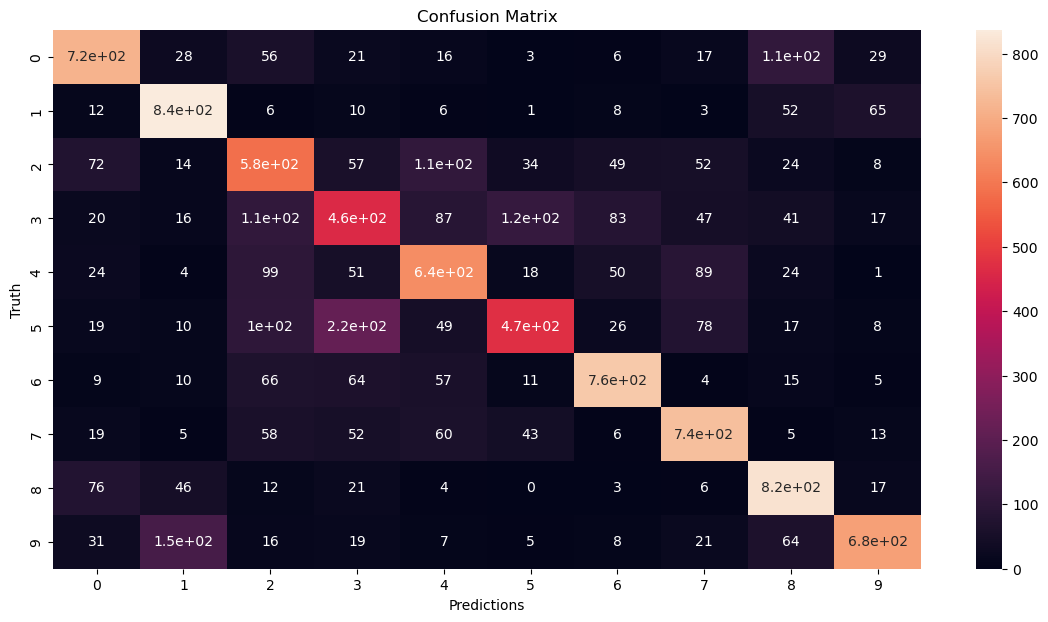

In [80]:
plt.figure(figsize=(14, 7))
sns.heatmap(cm, annot=True)
plt.ylabel("Truth")
plt.xlabel("Predictions")
plt.title("Confusion Matrix")
plt.show()